# Load files

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

image_survey_metrics = pickle.load( open( "image_survey_metrics.pickle", "rb" ) )

* create connection uid-image_id

In [3]:
imgid_uid = image_survey_metrics[['user_id','image_id']].drop_duplicates() #set a matrix
get_uid_from_imgid = imgid_uid.set_index('image_id').to_dict()['user_id'] # img_id -> uid
get_imgids_from_uid = {k: list(v) for k,v in imgid_uid.groupby('user_id')["image_id"]} # uid -> img_id 

In [4]:
len(image_survey_metrics)
image_survey_metrics.drop_duplicates(inplace=True)

In [5]:
len(image_survey_metrics)

913668

* Pick columns we need:

In [6]:
#Convenient way to select multiple columns to get
for c in image_survey_metrics.columns:
    print "'"+c+"',"

'image_id',
'image_height',
'image_width',
'image_filter',
'image_posted_time',
'data_memorability',
'user_id',
'user_followed_by',
'user_follows',
'user_posted_photos',
'anp_label',
'anp_sentiment',
'emotion_score',
'emotion_label',
'data_amz_label',
'data_amz_label_confidence',
'face_id',
'face_gender',
'face_gender_confidence',
'face_age_range_high',
'face_age_range_low',
'face_sunglasses',
'face_beard',
'face_beard_confidence',
'face_mustache',
'face_mustache_confidence',
'face_smile',
'face_smile_confidence',
'eyeglasses',
'eyeglasses_confidence',
'face_emo',
'emo_confidence',
'id',
'gender',
'born',
'education',
'employed',
'income',
'A_2',
'N_1',
'P_1',
'E_1',
'A_1',
'H_1',
'M_1',
'R_1',
'M_2',
'E_2',
'LON',
'H_2',
'P_2',
'N_2',
'A_3',
'N_3',
'E_3',
'H_3',
'R_2',
'M_3',
'R_3',
'P_3',
'HAP',
'insta_user_id',
'end_q',
'P',
'E',
'R',
'M',
'A',
'PERMA',
'N_EMO',
'P_EMO',
'imagecount',
'comment_count',
'like_count',


# Calculate weight for each image depending on date posted and survey of user

In [7]:
weights_df = image_survey_metrics[['image_id','image_posted_time','end_q']]

In [8]:
weights_df = weights_df.set_index('image_id').drop_duplicates()

In [9]:
weights_df

,image_posted_time,end_q
image_id,,
1222392034123570094_53918317,2016-04-06 11:01:47,2016-12-05 14:06:38
1226052661266340072_53918317,2016-04-11 12:14:48,2016-12-05 14:06:38
1221675301549103374_53918317,2016-04-05 11:17:46,2016-12-05 14:06:38
1219523282340141399_53918317,2016-04-02 12:02:05,2016-12-05 14:06:38
1219058668716415516_53918317,2016-04-01 20:38:59,2016-12-05 14:06:38
1372870097060159201_53918317,2016-10-31 01:54:50,2016-12-05 14:06:38
1376341630843643565_53918317,2016-11-04 20:52:09,2016-12-05 14:06:38
1373407612938533591_53918317,2016-10-31 19:42:47,2016-12-05 14:06:38
1372871586851626025_53918317,2016-10-31 01:57:48,2016-12-05 14:06:38


In [10]:
weights_df['difference'] = weights_df.image_posted_time-weights_df.end_q

In [11]:
weights_df = pd.DataFrame(weights_df['difference'],index=weights_df.index)

In [12]:
## Important: have changed functions - old still in the file (_old)
from WeightsByDate import Get_Linear_Weight, Get_Uniform_Weight

In [13]:
weights_df['weight'] = map(lambda x: Get_Linear_Weight(x,days_drop_interval=90), weights_df.difference)

In [15]:
weights_df.sample(10)

,difference,weight
image_id,,
1137080669636877094_1097967773,-361 days +01:22:58,0.000000
1449380018798077117_3988856,70 days 01:20:47,0.222222
1504093264843465531_1708321363,145 days 07:22:34,0.000000
1153869783223410609_235671446,-338 days +04:52:30,0.000000
1511113606195803756_703978203,89 days 19:51:36,0.011111
1422806285049725847_1901242351,-68 days +07:26:39,0.244444
1350517842264743864_244047076,-67 days +10:52:52,0.255556
1272126353288976905_53918317,-175 days +11:48:22,0.000000
1526942536785161626_372088523,83 days 20:49:53,0.077778


In [16]:
get_img_weight = weights_df.to_dict()['weight']

In [17]:
get_img_weight['1219058668716415516_53918317']

0.0

# Construct the final ANP matrix (for each image), with the corresponding features extracted

* Load ANP dataset

In [18]:
# # LOAD FROM feather !!!!!!!!
# import feather
# anp_df = feather.api.read_dataframe('data_science_case/anp.feather')

In [19]:
#load ANPs from Aris pickle df
anp_df = image_survey_metrics[['image_id', 'anp_label', 'anp_sentiment', 'emotion_score',
       'emotion_label']].drop_duplicates().set_index("image_id")
del anp_df.index.name

In [20]:
anp_df.head(15)

,anp_label,anp_sentiment,emotion_score,emotion_label
1222392034123570094_53918317,comic_life,0.129,0.1169,amazement
1222392034123570094_53918317,funny_quotes,0.078,0.1554,amazement
1222392034123570094_53918317,unique_gifts,0.049,0.1316,interest
1222392034123570094_53918317,true_story,0.371,0.1067,interest
1222392034123570094_53918317,long_lashes,-0.021,0.1479,ecstasy
1226052661266340072_53918317,comic_life,0.129,0.1169,amazement
1226052661266340072_53918317,silly_faces,-0.230,0.1281,sadness
1226052661266340072_53918317,stupid_face,-0.750,0.1028,sadness
1226052661266340072_53918317,hot_lips,0.017,0.2222,amazement
1226052661266340072_53918317,little_chef,-0.056,0.0991,joy


In [21]:
len(anp_df)

26901

### Create features based on ANPs for each image

In [22]:
#generate a new df containing the classes corresponding to Butchniks emotions
classes = anp_df.emotion_label.unique()
from sklearn.preprocessing import label_binarize
anp_final = pd.DataFrame(label_binarize(anp_df.emotion_label, classes=classes),columns=classes,index=anp_df.index)

anp_final.head()

#put the value of emotion score in the corresponding row of the image
anp_final = anp_final.multiply(anp_df.emotion_score,axis=0)
anp_final.head(20)

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
1222392034123570094_53918317,0.1169,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222392034123570094_53918317,0.1554,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222392034123570094_53918317,0.0000,0.1316,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222392034123570094_53918317,0.0000,0.1067,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222392034123570094_53918317,0.0000,0.0000,0.1479,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226052661266340072_53918317,0.1169,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226052661266340072_53918317,0.0000,0.0000,0.0000,0.1281,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226052661266340072_53918317,0.0000,0.0000,0.0000,0.1028,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226052661266340072_53918317,0.2222,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226052661266340072_53918317,0.0000,0.0000,0.0000,0.0000,0.0991,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#sum all emotions over each image
anp_final = anp_final.groupby(anp_final.index).sum()
anp_final.head(10)

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
1133540080528825625_235671446,0.3481,0.0000,0.0,0.2466,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.1224,0.0,0.0,0.0,0.0
1133574285848421662_288335200,0.7115,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.098,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133585745084332210_50853245,0.0000,0.0000,0.0,0.2300,0.6469,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133669091363706914_31736205,0.5401,0.1344,0.0,0.0000,0.1377,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133670195944446080_183823541,0.1135,0.1295,0.0,0.1124,0.0000,0.0823,0.0,0.000,0.0000,0.0,0.0,0.0608,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133670438148724870_183823541,0.3665,0.0000,0.0,0.0000,0.1270,0.0823,0.0,0.000,0.1317,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133677357037016056_249861555,0.9123,0.2203,0.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133762711687139568_703978203,0.2201,0.0000,0.0,0.2703,0.0000,0.0000,0.0,0.000,0.1495,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133789380531429768_265063047,0.3301,0.0000,0.0,0.1024,0.0839,0.0000,0.0,0.000,0.0000,0.0,0.0,0.1765,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1133857277262041337_703978203,0.4396,0.0000,0.0,0.1223,0.1152,0.0000,0.0,0.000,0.0000,0.0,0.0,0.1213,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0


In [24]:
# #sum all sentiments of label corresponding to the image
# anp_final['anp_sentiment'] = anp_df['anp_sentiment'].groupby(anp_df.index).sum()
# anp_final.head(10)

### Normalize the matrix over row (image)

In [25]:
#check sum of emotions per image
anp_final.sum(axis=1).head()

1133540080528825625_235671446    0.7171
1133574285848421662_288335200    0.8095
1133585745084332210_50853245     0.8769
1133669091363706914_31736205     0.8122
1133670195944446080_183823541    0.4985
dtype: float64

In [27]:
anp_final.columns

Index([u'amazement', u'interest', u'ecstasy', u'sadness', u'joy', u'surprise',
       u'anger', u'fear', u'terror', u'trust', u'annoyance', u'serenity',
       u'rage', u'boredom', u'grief', u'pensiveness', u'acceptance',
       u'disgust', u'distraction', u'anticipation'],
      dtype='object')

In [28]:
# #keep sentiment to normalize the rest of features (24 emotions of Putchnik)
# anp_sentiment_temp = anp_final['anp_sentiment']
# anp_final.drop('anp_sentiment',axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import normalize

In [30]:
anp_final = pd.DataFrame(normalize(anp_final,norm='l1',axis=1),index=anp_final.index,columns=anp_final.columns)

In [31]:
#test that its OK
anp_final.head()

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
1133540080528825625_235671446,0.485427,0.000000,0.0,0.343885,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.170687,0.0,0.0,0.0,0.0
1133574285848421662_288335200,0.878938,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.121062,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1133585745084332210_50853245,0.000000,0.000000,0.0,0.262288,0.737712,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1133669091363706914_31736205,0.664984,0.165476,0.0,0.000000,0.169540,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1133670195944446080_183823541,0.227683,0.259779,0.0,0.225476,0.000000,0.165095,0.0,0.000000,0.0,0.0,0.0,0.121966,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [32]:
#if its OK all should be 1
anp_final.sum(axis=1).head()

1133540080528825625_235671446    1.0
1133574285848421662_288335200    1.0
1133585745084332210_50853245     1.0
1133669091363706914_31736205     1.0
1133670195944446080_183823541    1.0
dtype: float64

In [33]:
#put back the emotion sentiment
anp_final['anp_sentiment'] = anp_sentiment_temp

NameError: name 'anp_sentiment_temp' is not defined

# Export matrix

In [31]:
# # extract the matrix
# import pickle
# with open ('ANP_features_per_image.pickle','wb') as f:
#     pickle.dump(anp_final,f)

# Correlate

### Load Y variable(s)

In [34]:
image_survey_metrics.columns

Index([u'image_id', u'image_height', u'image_width', u'image_filter',
       u'image_posted_time', u'data_memorability', u'user_id',
       u'user_followed_by', u'user_follows', u'user_posted_photos',
       u'anp_label', u'anp_sentiment', u'emotion_score', u'emotion_label',
       u'data_amz_label', u'data_amz_label_confidence', u'face_id',
       u'face_gender', u'face_gender_confidence', u'face_age_range_high',
       u'face_age_range_low', u'face_sunglasses', u'face_beard',
       u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence',
       u'face_smile', u'face_smile_confidence', u'eyeglasses',
       u'eyeglasses_confidence', u'face_emo', u'emo_confidence', u'id',
       u'gender', u'born', u'education', u'employed', u'income', u'A_2',
       u'N_1', u'P_1', u'E_1', u'A_1', u'H_1', u'M_1', u'R_1', u'M_2', u'E_2',
       u'LON', u'H_2', u'P_2', u'N_2', u'A_3', u'N_3', u'E_3', u'H_3', u'R_2',
       u'M_3', u'R_3', u'P_3', u'HAP', u'insta_user_id', u'end_q', u'P'

In [36]:
# PERMA_df = image_survey_metrics[['image_id','user_id','P',
#     'E',
#     'R',
#     'M',
#     'A',
#     'PERMA',
#     'image_posted_time',
#     'end_q']].drop_duplicates()#.set_index('image_id')
# del PERMA_df.index.name
# print 'len(PERMA_df):', len(PERMA_df)
# print ' '
# PERMA_df.head(15)

# Aggregate score for each user

# TODO: find <u>active</u> images per user and average by that

* Load Y variable

# AAAAAAAAAAAAAAAAAAA

In [37]:
#keep variables to calculate real PERMA score
for l in ['P','E','R','M','A']:
    for n in [1,2,3]:
        print "'%s_%s',"%(l,n)

#image_survey_metrics.set_index('user_id',inplace=True)

perma_individ = ['P_1','P_2','P_3','E_1','E_2','E_3','R_1','R_2','R_3','M_1','M_2','M_3','A_1','A_2','A_3',]
PERMA_dict = image_survey_metrics[perma_individ].sum(axis=1).to_dict()
PERMA_df = image_survey_metrics[['HAP','image_posted_time','end_q','image_id']]

PERMA_df['PERMA_real'] = map(lambda x: PERMA_dict[x]/float(len(perma_individ)),PERMA_df.index)
PERMA_df['P']= image_survey_metrics[perma_individ[:3]].sum(axis=1)/3.
PERMA_df['E']= image_survey_metrics[perma_individ[3:6]].sum(axis=1)/3.
PERMA_df['R']= image_survey_metrics[perma_individ[6:9]].sum(axis=1)/3.
PERMA_df['M']= image_survey_metrics[perma_individ[9:12]].sum(axis=1)/3.
PERMA_df['A']= image_survey_metrics[perma_individ[12:15]].sum(axis=1)/3.

'P_1',
'P_2',
'P_3',
'E_1',
'E_2',
'E_3',
'R_1',
'R_2',
'R_3',
'M_1',
'M_2',
'M_3',
'A_1',
'A_2',
'A_3',


/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [38]:
PERMA_df.head()

,HAP,image_posted_time,end_q,image_id,PERMA_real,P,E,R,M,A
0,5.0,2016-04-06 11:01:47,2016-12-05 14:06:38,1222392034123570094_53918317,5.2,3.333333,6.333333,6.666667,4.0,5.666667
1,5.0,2016-04-06 11:01:47,2016-12-05 14:06:38,1222392034123570094_53918317,5.2,3.333333,6.333333,6.666667,4.0,5.666667
2,5.0,2016-04-06 11:01:47,2016-12-05 14:06:38,1222392034123570094_53918317,5.2,3.333333,6.333333,6.666667,4.0,5.666667
3,5.0,2016-04-06 11:01:47,2016-12-05 14:06:38,1222392034123570094_53918317,5.2,3.333333,6.333333,6.666667,4.0,5.666667
4,5.0,2016-04-06 11:01:47,2016-12-05 14:06:38,1222392034123570094_53918317,5.2,3.333333,6.333333,6.666667,4.0,5.666667


# AAAAAAAAAAAAAA

# Aggregate score per user

In [36]:
# '''
# Usage: get_img_weight['1300904299735789673_143854846']
# > 0.0
# '''

# get_img_weight = PERMA_df.set_index('image_id').to_dict()['image_weight']


In [39]:
anp_final.head()

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
1133540080528825625_235671446,0.485427,0.000000,0.0,0.343885,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.170687,0.0,0.0,0.0,0.0
1133574285848421662_288335200,0.878938,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.121062,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1133585745084332210_50853245,0.000000,0.000000,0.0,0.262288,0.737712,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1133669091363706914_31736205,0.664984,0.165476,0.0,0.000000,0.169540,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1133670195944446080_183823541,0.227683,0.259779,0.0,0.225476,0.000000,0.165095,0.0,0.000000,0.0,0.0,0.0,0.121966,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [40]:
anp_final.sum(axis=1).head()
#its ok because we also have anp_sentiment

1133540080528825625_235671446    1.0
1133574285848421662_288335200    1.0
1133585745084332210_50853245     1.0
1133669091363706914_31736205     1.0
1133670195944446080_183823541    1.0
dtype: float64

In [41]:
#get index based weight
anp_final_weighted = anp_final.multiply(map(lambda x: get_img_weight[x],anp_final.index),axis=0)

In [42]:
anp_final_weighted.sample(5)

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
1539408468003055651_22180590,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1143166939329176063_265063047,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1393016234185994151_287562303,0.911111,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417689509524904774_246095675,0.315670,0.0,0.0,0.074803,0.320638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1321189829044385119_145242840,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
anp_final_weighted['user_id'] = map(lambda x: get_uid_from_imgid[x],anp_final_weighted.index)

In [44]:
anp_final_weighted = anp_final_weighted.set_index('user_id')

In [45]:
anp_final_weighted

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
user_id,,,,,,,,,,,,,,,,,,,,
2.356714e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.883352e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.085324e+07,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.173620e+07,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.838235e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.838235e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.498616e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.039782e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.650630e+08,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Sum all weighted images
anp_final_weighted_per_user = anp_final_weighted.groupby(anp_final_weighted.index).sum()

In [47]:
len(anp_sentiment_temp)

NameError: name 'anp_sentiment_temp' is not defined

In [48]:

anp_final_weighted_per_user

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
user_id,,,,,,,,,,,,,,,,,,,,
1.619510e+06,6.088295,0.954767,0.000000,1.377934,2.083668,0.200046,0.260948,0.278186,0.229228,0.000000,0.000000,0.000000,0.000000,0.000000,0.115816,0.000000,0.000000,0.000000,0.000000,0.000000
2.829661e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.069744e+06,0.072956,0.087531,0.000000,0.000000,0.143616,0.000000,0.040341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.988856e+06,1.734387,0.316993,0.000000,0.431711,0.727446,0.000000,0.205998,0.000000,0.000000,0.016798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.185084e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.734387e+06,3.087397,0.000000,0.000000,0.166220,1.138799,0.000000,0.046535,0.000000,0.077064,0.142490,0.000000,0.427621,0.000000,0.000000,0.000000,0.000000,0.147207,0.000000,0.000000,0.000000
7.410944e+06,2.641340,0.591365,0.000000,1.489550,1.977393,0.000000,0.222227,0.000000,0.179248,0.078533,0.000000,0.383888,0.000000,0.125346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8.854187e+06,9.583807,0.832993,0.000000,6.499813,13.242375,0.000000,2.982609,0.705827,0.130276,0.209858,0.000000,0.256133,0.328088,0.067907,0.000000,0.174655,0.000000,0.000000,0.000000,0.174548
1.152083e+07,1.435633,0.244062,0.000000,0.430747,0.404148,0.000000,0.000000,0.083347,0.000000,0.000000,0.000000,0.035397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
# #keep anp sentiment in temp and drop it to normalize rest
# anp_sentiment_temp=anp_final_weighted.anp_sentiment
# anp_final_weighted.drop('anp_sentiment',inplace=True,axis=1)
# anp_final_weighted_per_user.drop('anp_sentiment',inplace=True,axis=1)

# Stopped here last time

In [52]:
len(anp_final_weighted_per_user)

125

In [53]:
#normalize
anp_final_weighted_per_user = pd.DataFrame(normalize(anp_final_weighted_per_user,axis=1,norm='l1'),index=anp_final_weighted_per_user.index,columns=anp_final_weighted_per_user.columns)

In [56]:
anp_final_weighted_per_user.sample(5)

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
user_id,,,,,,,,,,,,,,,,,,,,
703978203.0,0.447707,0.075718,0.000000,0.144109,0.227872,0.019217,0.034137,0.004830,0.005158,0.008599,0.004436,0.009346,0.012943,0.003883,0.000000,0.000000,0.0,0.002045,0.0,0.000000
30837828.0,0.548716,0.049618,0.011218,0.101087,0.181854,0.007143,0.045540,0.012029,0.009307,0.002641,0.000000,0.003024,0.012117,0.004073,0.001471,0.006194,0.0,0.000000,0.0,0.003968
49846561.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
531942752.0,0.890015,0.000000,0.000000,0.000000,0.109985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
45655555.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [137]:
# anp_sentiment_per_user = anp_sentiment_temp.groupby(anp_sentiment_temp.index).mean()

In [57]:
# anp_final_weighted_per_user

In [58]:
anp_final_weighted_per_user.sum(axis=1).value_counts()

1.0    53
0.0    27
1.0    20
1.0    15
1.0    10
dtype: int64

In [59]:
#keep only users who have images over past time
anp_final_weighted_per_user = anp_final_weighted_per_user[anp_final_weighted_per_user.sum(axis=1)>0]

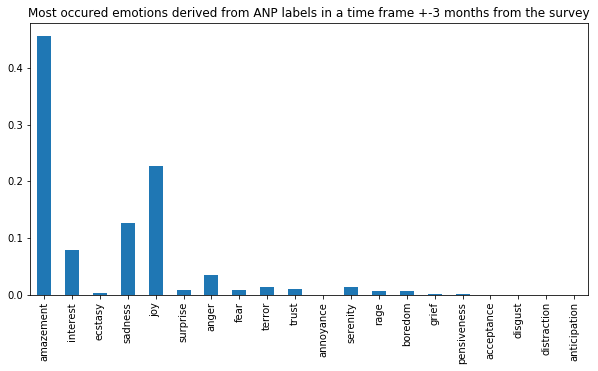

In [61]:
anp_final_weighted_per_user.mean(axis=0).plot(kind='bar',figsize=(10,5))
plt.title('Most occured emotions derived from ANP labels in a time frame +-3 months from the survey')

In [62]:
anp_final_weighted_per_user.head(10)

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
user_id,,,,,,,,,,,,,,,,,,,,
1619510.0,0.525356,0.082386,0.0,0.118901,0.179799,0.017262,0.022517,0.024005,0.019780,0.000000,0.0,0.000000,0.000000,0.000000,0.009994,0.000000,0.000000,0.000000,0.0,0.00000
3069744.0,0.211809,0.254122,0.0,0.000000,0.416950,0.000000,0.117119,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
3988856.0,0.505161,0.092328,0.0,0.125741,0.211877,0.000000,0.059999,0.000000,0.000000,0.004893,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
6734387.0,0.589949,0.000000,0.0,0.031762,0.217605,0.000000,0.008892,0.000000,0.014726,0.027227,0.0,0.081711,0.000000,0.000000,0.000000,0.000000,0.028129,0.000000,0.0,0.00000
7410944.0,0.343527,0.076912,0.0,0.193728,0.257175,0.000000,0.028902,0.000000,0.023313,0.010214,0.0,0.049928,0.000000,0.016302,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
8854187.0,0.272353,0.023672,0.0,0.184712,0.376323,0.000000,0.084760,0.020058,0.003702,0.005964,0.0,0.007279,0.009324,0.001930,0.000000,0.004963,0.000000,0.000000,0.0,0.00496
11520833.0,0.545177,0.092682,0.0,0.163575,0.153474,0.000000,0.000000,0.031651,0.000000,0.000000,0.0,0.013442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
13745951.0,0.452149,0.092906,0.0,0.124577,0.242332,0.007347,0.005051,0.000000,0.009924,0.039521,0.0,0.009664,0.000000,0.000000,0.000000,0.000000,0.009926,0.006603,0.0,0.00000
18108188.0,0.000000,0.114265,0.0,0.349184,0.536551,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000


In [65]:
anp_final_weighted_per_user.sum(axis=1).head()

user_id
1619510.0    1.0
3069744.0    1.0
3988856.0    1.0
6734387.0    1.0
7410944.0    1.0
dtype: float64

# Correlations

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
import seaborn as sns

In [68]:
for c in image_survey_metrics.columns:
    print '"%s",' %c

"image_id",
"image_height",
"image_width",
"image_filter",
"image_posted_time",
"data_memorability",
"user_id",
"user_followed_by",
"user_follows",
"user_posted_photos",
"anp_label",
"anp_sentiment",
"emotion_score",
"emotion_label",
"data_amz_label",
"data_amz_label_confidence",
"face_id",
"face_gender",
"face_gender_confidence",
"face_age_range_high",
"face_age_range_low",
"face_sunglasses",
"face_beard",
"face_beard_confidence",
"face_mustache",
"face_mustache_confidence",
"face_smile",
"face_smile_confidence",
"eyeglasses",
"eyeglasses_confidence",
"face_emo",
"emo_confidence",
"id",
"gender",
"born",
"education",
"employed",
"income",
"A_2",
"N_1",
"P_1",
"E_1",
"A_1",
"H_1",
"M_1",
"R_1",
"M_2",
"E_2",
"LON",
"H_2",
"P_2",
"N_2",
"A_3",
"N_3",
"E_3",
"H_3",
"R_2",
"M_3",
"R_3",
"P_3",
"HAP",
"insta_user_id",
"end_q",
"P",
"E",
"R",
"M",
"A",
"PERMA",
"N_EMO",
"P_EMO",
"imagecount",
"comment_count",
"like_count",


In [69]:
x_vars = ["amazement",
"interest",
"ecstasy",
"sadness",
"joy",
"surprise",
"anger",
"fear",]
# "terror",
# "trust",
# "annoyance",
# "serenity",
# "rage",
# "boredom",
# "grief",
# "pensiveness",
# "acceptance",
# "disgust",
# "distraction",
# "anticipation",
# "anp_sentiment",]

In [70]:
y_vars = ["PERMA_real"]

In [71]:
correlation_matrix = anp_final_weighted_per_user.corr()

In [72]:
anp_final_weighted_per_user

,amazement,interest,ecstasy,sadness,joy,surprise,anger,fear,terror,trust,annoyance,serenity,rage,boredom,grief,pensiveness,acceptance,disgust,distraction,anticipation
user_id,,,,,,,,,,,,,,,,,,,,
1.619510e+06,0.525356,0.082386,0.000000,0.118901,0.179799,0.017262,0.022517,0.024005,0.019780,0.000000,0.000000,0.000000,0.000000,0.000000,0.009994,0.000000,0.000000,0.000000,0.000000,0.000000
3.069744e+06,0.211809,0.254122,0.000000,0.000000,0.416950,0.000000,0.117119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.988856e+06,0.505161,0.092328,0.000000,0.125741,0.211877,0.000000,0.059999,0.000000,0.000000,0.004893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.734387e+06,0.589949,0.000000,0.000000,0.031762,0.217605,0.000000,0.008892,0.000000,0.014726,0.027227,0.000000,0.081711,0.000000,0.000000,0.000000,0.000000,0.028129,0.000000,0.000000,0.000000
7.410944e+06,0.343527,0.076912,0.000000,0.193728,0.257175,0.000000,0.028902,0.000000,0.023313,0.010214,0.000000,0.049928,0.000000,0.016302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8.854187e+06,0.272353,0.023672,0.000000,0.184712,0.376323,0.000000,0.084760,0.020058,0.003702,0.005964,0.000000,0.007279,0.009324,0.001930,0.000000,0.004963,0.000000,0.000000,0.000000,0.004960
1.152083e+07,0.545177,0.092682,0.000000,0.163575,0.153474,0.000000,0.000000,0.031651,0.000000,0.000000,0.000000,0.013442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.374595e+07,0.452149,0.092906,0.000000,0.124577,0.242332,0.007347,0.005051,0.000000,0.009924,0.039521,0.000000,0.009664,0.000000,0.000000,0.000000,0.000000,0.009926,0.006603,0.000000,0.000000
1.810819e+07,0.000000,0.114265,0.000000,0.349184,0.536551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
todrop = ['P','E','R','M','A','image_weight']
correlation_matrix.drop(todrop,inplace=True)
correlation_matrix.drop(todrop,axis=1,inplace=True)


ValueError: labels ['P' 'E' 'R' 'M' 'A' 'image_weight'] not contained in axis

# Find correlation between putchniks emotions themselves

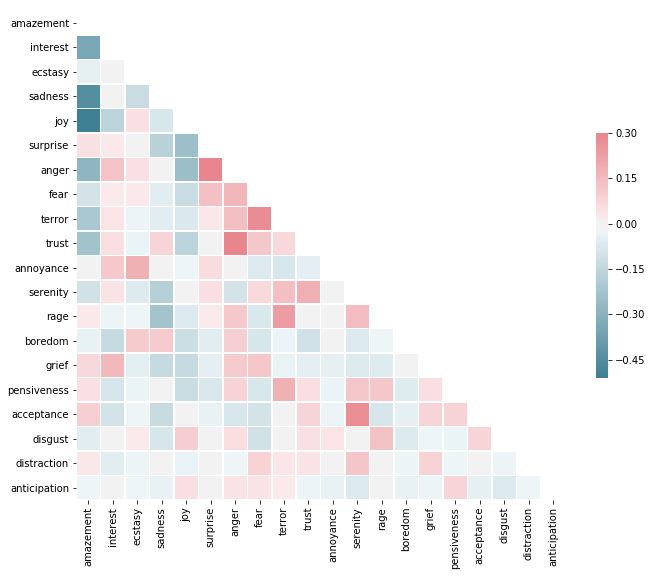

In [76]:

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# TODO: add PERMA (real, float) and see correlations between them

# find p-values

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
def subtrack_features(main_list, subtr_features):
    '''Throw away some features (columns)'''
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    '''Prepare input command (string) for statmodel'''
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    '''Run a linear regression print the coefficients and return the linear model.'''
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [ ]:
cols = list(anp_final_weighted_per_user.columns)

In [ ]:
score_cols = ['HAP','P','E','R','M','A', 'PERMA_real']

In [ ]:
final_cols = [x for x in cols if x not in score_cols]

In [ ]:
features = [x for x in final_cols if x not in ['image_posted_time','image_weight']]

In [ ]:
features

In [ ]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
lm_model = regression_stats(prepare_set_statmodel(features),anp_final_weighted_per_user)
lm_model.summary() 

# seaborn pairplots

In [ ]:
pair_df = anp_final_weighted_per_user.merge(PERMA_df,right_index=True,left_index=True)

In [ ]:
sns.pairplot(pair_df,x_vars=x_vars,y_vars=y_vars,size=5)

In [ ]:
sns.pairplot(pair_df,size=5)

In [ ]:
corr_matrix = .corr()

In [ ]:
corr_matrix.head()